In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import yfinance as yf

In [2]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,8.)})
sns.set_style("whitegrid")

## Loading the data 

In [3]:
df_merged = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,index,PMI
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,NaN
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,NaN
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1818,2022-07-01,21578.8,3918.75,296.276,247933.0,NaN,NaN,NaN,NaN
1819,2022-08-01,21546.4,4167.51,296.171,247482.8,NaN,NaN,NaN,NaN
1820,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,NaN
1821,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,NaN


In [4]:
df_merged_2 = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_2_quandl.csv") # Open the dataframe
df_merged_2['Date'] = df_merged_2["Date"].astype('datetime64[ns]') # Change the date from object to datatime - important for visalization
df_merged_2

,Date,S&P 500,GDP,Cons. Sent.,US Big Mac
0,1871-01-01,105.76,NaN,NaN,NaN
1,1871-02-01,104.02,NaN,NaN,NaN
2,1871-03-01,105.01,NaN,NaN,NaN
3,1871-04-01,112.01,NaN,NaN,NaN
4,1871-05-01,117.56,NaN,NaN,NaN
...,...,...,...,...,...
1818,2022-07-01,3918.75,NaN,51.5,5.15
1819,2022-08-01,4167.51,NaN,58.2,NaN
1820,2022-09-01,3850.52,NaN,58.6,NaN
1821,2022-10-01,3726.05,NaN,59.9,NaN


## First Set of Economic Data  

[Text(0.5, 1.0, 'Consumer Price Index')]

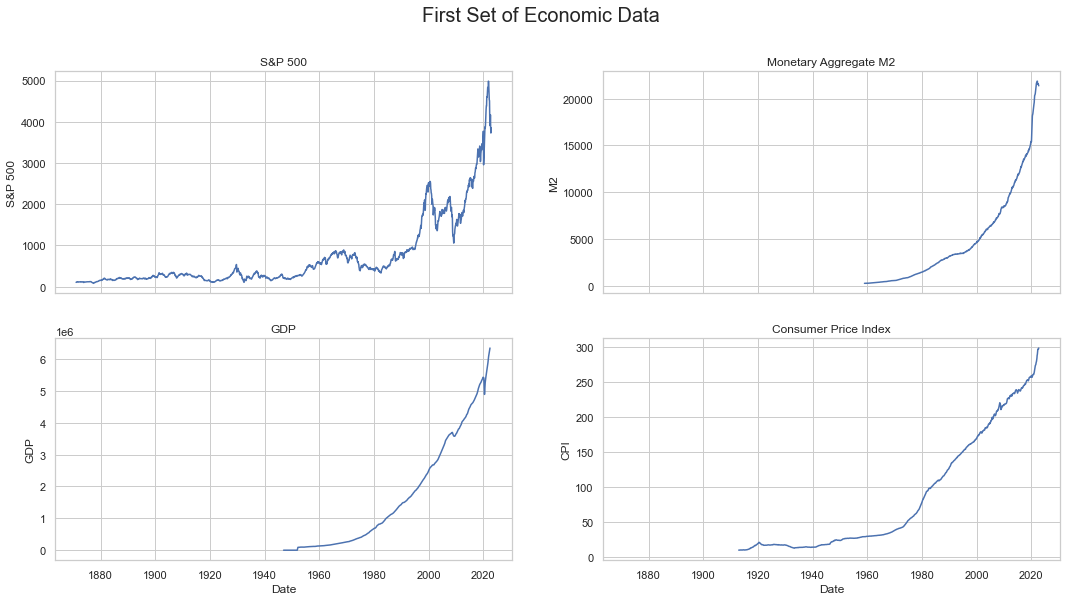

In [5]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('First Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='S&P 500').set(title='S&P 500')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='M2').set(title='Monetary Aggregate M2')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='GDP').set(title='GDP')
sns.lineplot(ax=axes[1, 1], data=df_merged, x='Date', y='CPI').set(title='Consumer Price Index')

## Second Set of Economic Data 

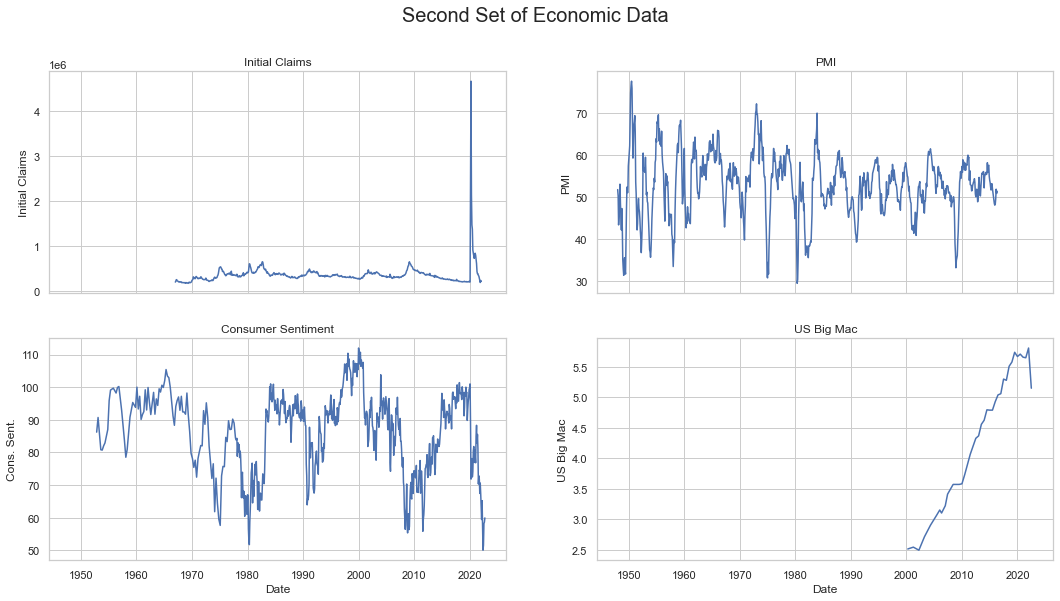

In [6]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('Second Set of Economic Data', fontsize=20)

graph_1 = sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='Initial Claims').set(title='Initial Claims')
graph_2 = sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='PMI').set(title='PMI')
graph_3 = sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='Cons. Sent.').set(title='Consumer Sentiment')
graph_4 = sns.lineplot(ax=axes[1, 1], data=df_merged_2, x='Date', y='US Big Mac').set(title='US Big Mac')

## Third Set of Economic Data 

[Text(0.5, 1.0, 'Revolving Credit')]

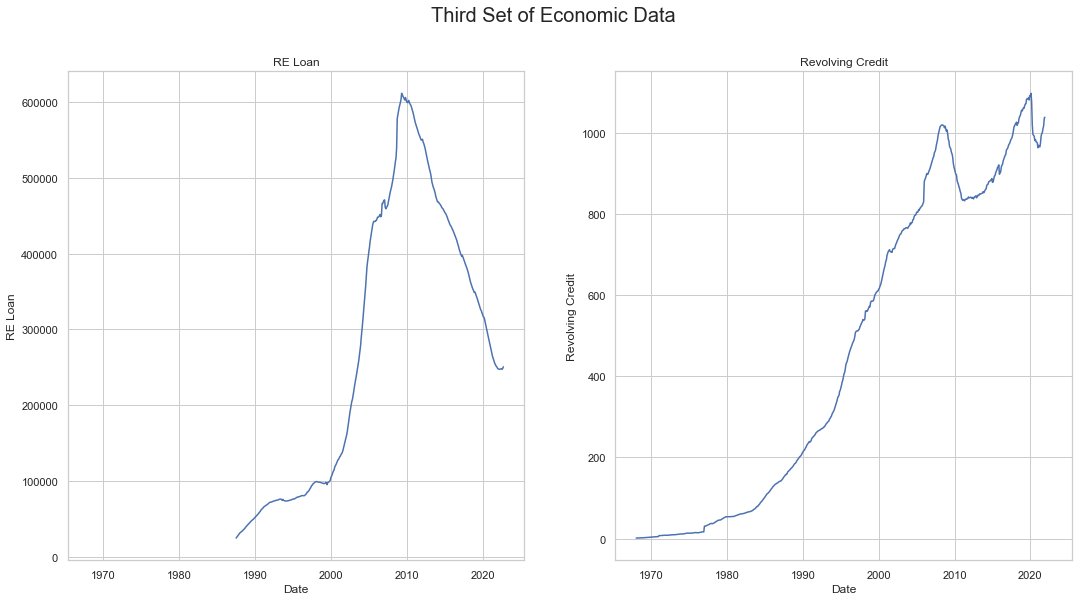

In [7]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18,9))
figure.suptitle('Third Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0], data=df_merged, x='Date', y='RE Loan').set(title='RE Loan')
sns.lineplot(ax=axes[1], data=df_merged, x='Date', y='Revolving Credit').set(title='Revolving Credit')

## Correlation matrix  

C:\Users\rapha\AppData\Local\Temp\ipykernel_33016\1262024336.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr(), dtype=np.bool))


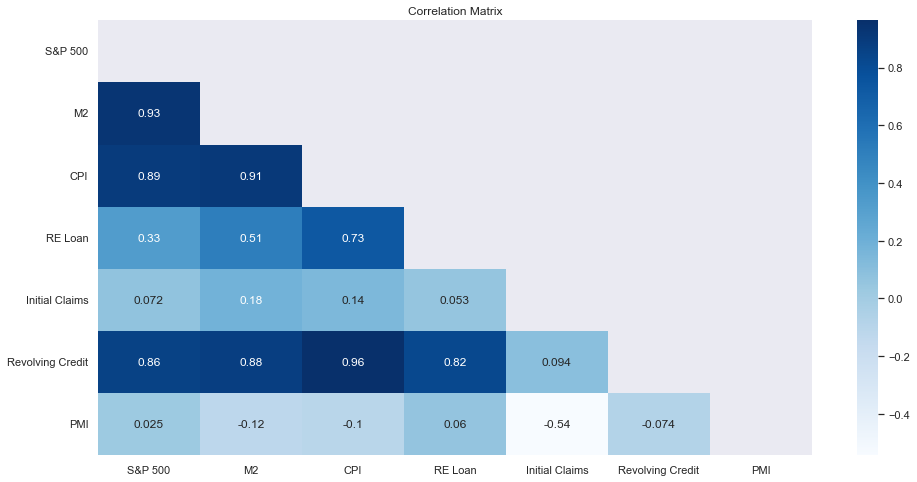

In [8]:
mask = np.triu(np.ones_like(df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr(), dtype=np.bool))


sns.set(rc={"figure.figsize": (16.,8.)})
corr_matrix = df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr()
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues').set(title='Correlation Matrix')
plt.show()

C:\Users\rapha\AppData\Local\Temp\ipykernel_33016\1229274978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_merged.corr()[['S&P 500']].sort_values(by='S&P 500', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')


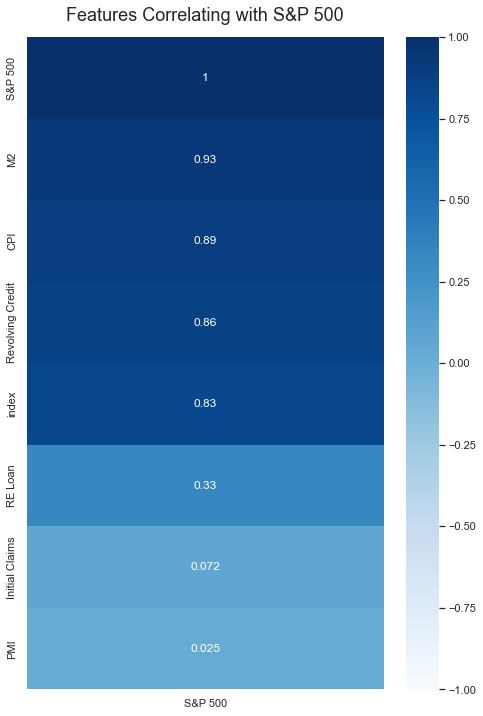

In [9]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_merged.corr()[['S&P 500']].sort_values(by='S&P 500', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with S&P 500' , fontdict={'fontsize':18}, pad=16);

C:\Users\rapha\AppData\Local\Temp\ipykernel_33016\1681081505.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr(), dtype=np.bool))


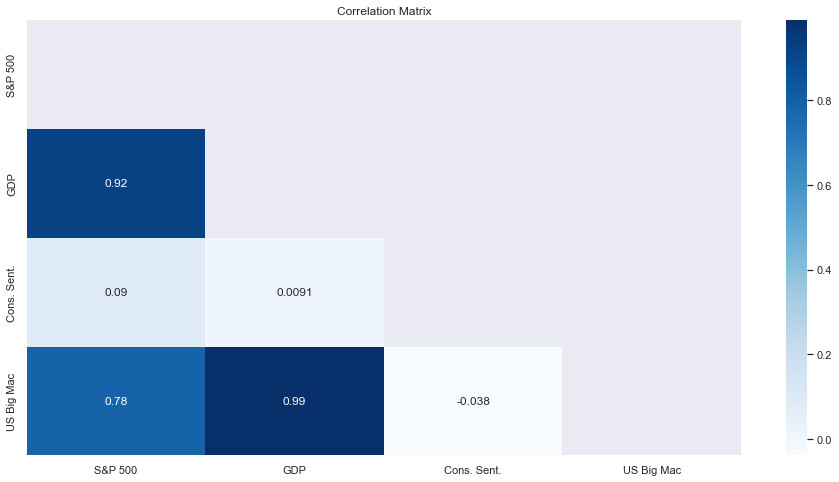

In [32]:
mask = np.triu(np.ones_like(df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr(), dtype=np.bool))

sns.set(rc={"figure.figsize": (16.,8.)})
corr_matrix_2 = df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr()
sns.heatmap(corr_matrix_2, annot=True ,mask=mask , cmap='Blues').set(title='Correlation Matrix')
plt.show()

## S&P Monthly Returns from 1871 to 2022

In [11]:
df_merged['monthly_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(1)) -1
df_merged['monthly_return']
df = pd.DataFrame(df_merged['monthly_return']) 

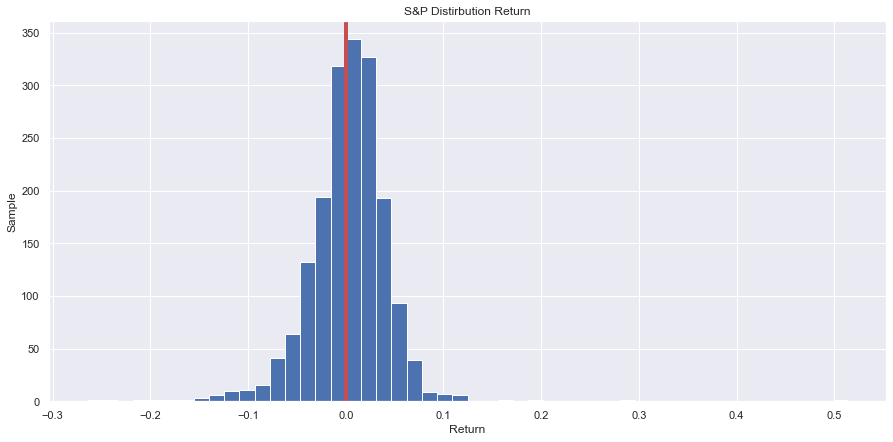

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['monthly_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.axvline(x=0, color='r', linewidth=4, linestyle='-')
plt.show()

In [13]:
pos_count, neg_count = 0, 0

for num in df['monthly_return']:
    if num >= 0:
        pos_count += 1
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  1032
Negative numbers in the list:  791


## S&P Annual Returns from 1871 to 2022

In [14]:
df = df_merged[['Date','S&P 500']]
df['annual_return'] = (df['S&P 500']/ df['S&P 500'].shift(12)) -1
df = df.iloc[::12,:]

C:\Users\rapha\AppData\Local\Temp\ipykernel_33016\532741283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_return'] = (df['S&P 500']/ df['S&P 500'].shift(12)) -1


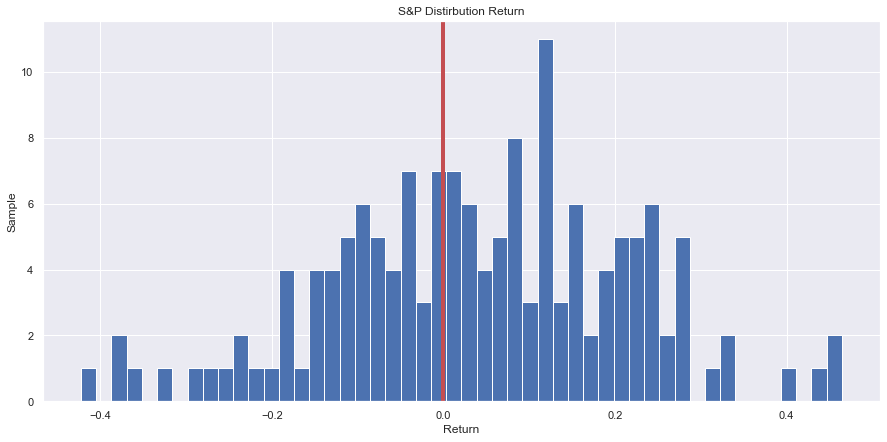

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df['annual_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.axvline(x=0, color='r', linewidth=4, linestyle='-')
plt.show()

In [16]:
pos_count, neg_count = 0, 0

for num in df['annual_return']:
    if num >= 0:
        pos_count += 1
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  90
Negative numbers in the list:  62


## Sector Distribution in the S&P 500

(503, 9)


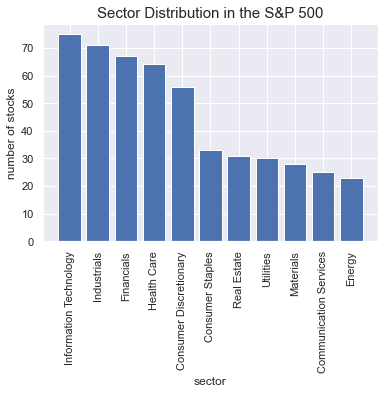

In [17]:
#retrived from https://wire.insiderfinance.io/data-analysis-of-s-p500-stocks-in-python-investment-strategy-during-post-pandemic-a7cf8926ee3e

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = tables[0]
second_table = tables[1]

df = first_table
print(df.shape)
df["Symbol"] = df["Symbol"].map(lambda x: x.replace(".", "-"))  # rename symbol to escape symbol error
sp500_tickers = list(df["Symbol"])
df.head()

plt.title('Sector Distribution in the S&P 500', fontsize=15)
sectors = df["GICS Sector"].value_counts()
plt.bar(sectors.index, sectors.values)
plt.xticks(rotation=90)
plt.xlabel("sector")
plt.ylabel("number of stocks")
plt.show()

## Rebasing the different paremeters to 100 and see their evolution starting in 1987

In [18]:
df_merged = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged.drop(['RE Loan', 'Initial Claims', 'Revolving Credit', 'PMI', 'index'], axis = 1 , inplace = True)
df_merged = df_merged.dropna()
df_merged =df_merged.reset_index()
df_merged = df_merged.iloc[336:]
df_merged = df_merged.reset_index()
df_merged.drop(['level_0', 'index'], axis = 1 , inplace = True)
df_merged

,Date,M2,S&P 500,CPI
0,1987-01-01,2753.5,705.99,111.200
1,1987-02-01,2735.2,747.07,111.600
2,1987-03-01,2748.0,774.45,112.100
3,1987-04-01,2778.9,761.90,112.700
4,1987-05-01,2759.7,758.68,113.100
...,...,...,...,...
425,2022-06-01,21585.4,3905.49,296.311
426,2022-07-01,21578.8,3918.75,296.276
427,2022-08-01,21546.4,4167.51,296.171
428,2022-09-01,21459.5,3850.52,296.808


In [19]:
def rebase(prices):
    return prices/prices[0]*100

In [20]:
df_rebase_1 = pd.DataFrame(rebase(df_merged['S&P 500']))
df_rebase_2 = pd.DataFrame(rebase(df_merged['M2']))
df_rebase_3 = pd.DataFrame(rebase(df_merged['CPI']))

In [21]:
df_rebase_all = df_rebase_1.join(df_rebase_2).join(df_rebase_3)


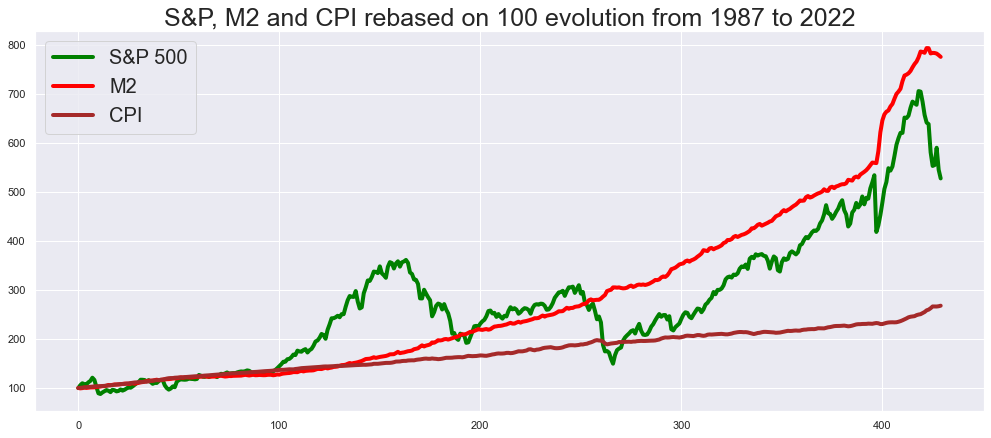

In [29]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.title('S&P, M2 and CPI rebased on 100 evolution from 1987 to 2022', fontsize = 25)
ax.plot(df_rebase_1, color = 'green', label = 'S&P 500', linewidth=4.0)
ax.plot(df_rebase_2, color = 'red', label = 'M2', linewidth=4.0)
ax.plot(df_rebase_3, color = 'brown', label = 'CPI', linewidth=4.0)
ax.legend(loc = 'upper left', fontsize = 20)
plt.show()


### Plotting the moving average  

In [23]:
df_merged = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged['Date'] = pd.to_datetime(df_merged['Date']) # putting back the day so we have beginning of the month everywhere
df_merged = df_merged.set_index(pd.DatetimeIndex(df_merged['Date'].values))
df_merged.drop(['Date','M2', 'CPI', 'RE Loan', 'Initial Claims', 'Revolving Credit', 'index', 'PMI'], axis = 1 , inplace = True)
df_merged = df_merged[1750:]
df_merged

,S&P 500
2016-11-01,2662.43
2016-12-01,2761.93
2017-01-01,2780.75
2017-02-01,2838.78
2017-03-01,2881.41
...,...
2022-07-01,3918.75
2022-08-01,4167.51
2022-09-01,3850.52
2022-10-01,3726.05


In [24]:
ma_months = [6,12,24]

for ma in ma_months:
    column_name = "MA for %s months" %(str(ma))
    
    df_merged[column_name] = df_merged['S&P 500'].rolling(window=ma,center=False).mean()

df_merged.tail()

,S&P 500,MA for 6 months,MA for 12 months,MA for 24 months
2022-07-01,3918.75,4267.716667,4568.768333,4430.541667
2022-08-01,4167.51,4188.855000,4513.342500,4442.809167
2022-09-01,3850.52,4075.540000,4433.373333,4443.337500
2022-10-01,3726.05,3945.175000,4344.978333,4436.220000
2022-11-01,3856.10,3904.070000,4250.979167,4428.230000


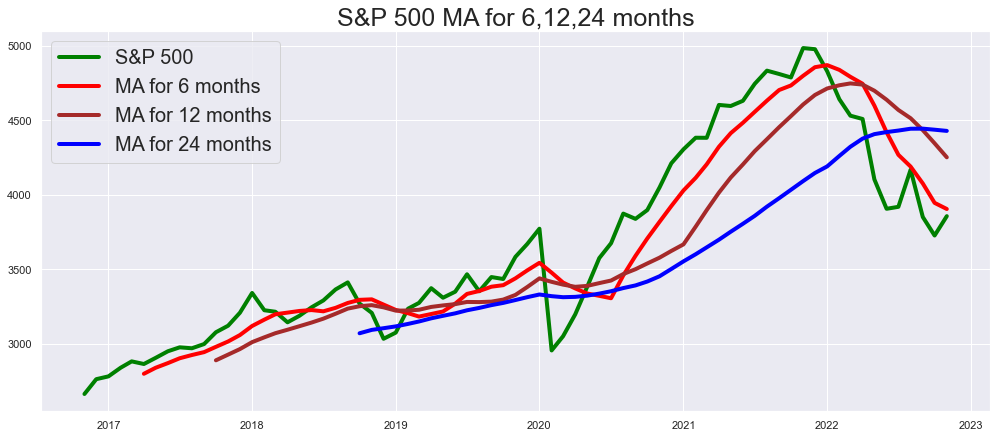

In [30]:
from matplotlib import pyplot as plt    

#fig = plt.figure()
#plt.plot(df_merged)
#fig.suptitle('test title', fontsize=20)
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)
#plt.legend(loc="upper left")



fig, ax = plt.subplots(figsize=(17, 7))
plt.title('S&P 500 MA for 6,12,24 months', fontsize = 25)
ax.plot(df_merged['S&P 500'], color = 'green', label = 'S&P 500', linewidth=4.0)
ax.plot(df_merged['MA for 6 months'], color = 'red', label = 'MA for 6 months', linewidth=4.0)
ax.plot(df_merged['MA for 12 months'], color = 'brown', label = 'MA for 12 months', linewidth=4.0)
ax.plot(df_merged['MA for 24 months'], color = 'blue', label = 'MA for 24 months', linewidth=4.0)
ax.legend(loc = 'upper left', fontsize = 20)
plt.show()